In [24]:
# This code splits the given dataset to test-train files.


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
import os

# Apply the default theme
sns.set_theme()

In [6]:
main_folder = Path('../')
results_file = main_folder / 'results_230202_130230.pkl'
results_file.is_file()

True

In [ ]:
df = pd.read_pickle(results_file)
#df

In [23]:
# Fix Nan value of hybrid1_all_ml_averaged

#df.loc["hybrid1_all_ml_averaged"]["training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
#df.loc["hybrid1_all_ml_averaged"]["testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
df.at["hybrid1_all_ml_averaged", "training time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["training time"]
df.at["hybrid1_all_ml_averaged", "testing time"] = df.loc["hybrid1_nb":"hybrid1_svm"].sum()["testing time"]
#df

,overall_accuracy,precision,recall,f1,tn,fp,fn,tp,training time,testing time
bow_nb,98.170533,0.976264,0.974550,0.975406,3789,54,58,2221,0.010756,0.003231
bow_xgboost,98.039856,0.998614,0.948662,0.972997,3840,3,117,2162,0.725747,0.043001
bow_svm,98.088860,0.996327,0.952172,0.973749,3835,8,109,2170,24.791483,1.239731
boc_nb,91.914407,0.830126,0.984204,0.900622,3384,459,36,2243,0.008005,0.006993
boc_xgboost,99.803986,0.999559,0.995173,0.997361,3842,1,11,2268,4.193236,0.022002
boc_svm,99.624306,0.998233,0.991663,0.994937,3839,4,19,2260,8.472854,1.077606
tfidf_nb,96.667756,0.969245,0.940325,0.954566,3775,68,136,2143,0.005005,0.000000
tfidf_xgboost,99.166939,0.998211,0.979377,0.988704,3839,4,47,2232,1.098062,0.016001
tfidf_svm,98.660568,0.992380,0.971479,0.981818,3826,17,65,2214,21.305787,1.179134
tfidfng_nb,92.159425,0.833766,0.985959,0.903498,3395,448,32,2247,0.010009,0.002993


In [ ]:
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
#df_sorted

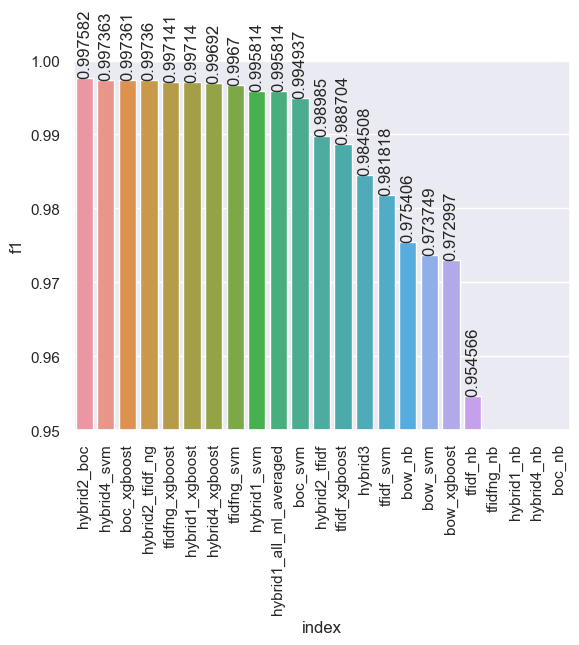

In [54]:
metric = 'f1'
df_sorted = df.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric)
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

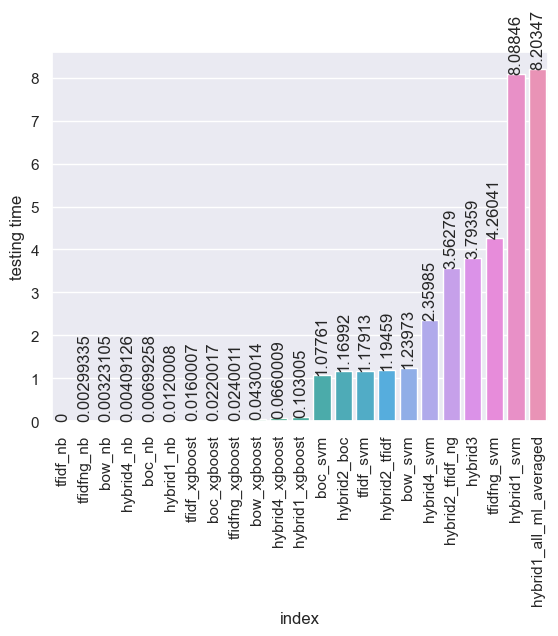

In [94]:
metric = 'testing time'
df_sorted = df.sort_values(metric,ascending=True).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric)
ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

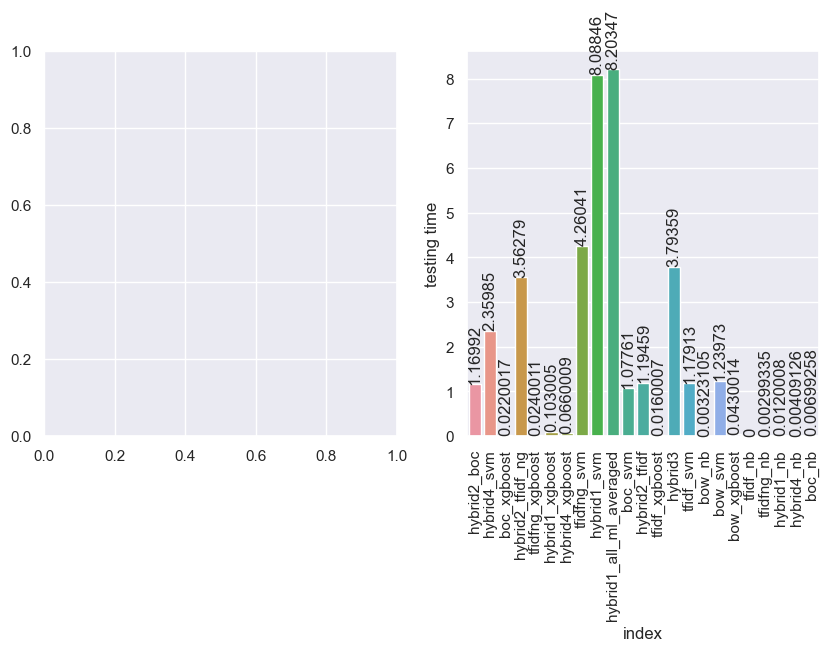

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

metric = 'f1'
df_sorted = df.sort_values(metric,ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric)
ax.tick_params(axis='x', rotation=90)
ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

metric = 'testing time'
#df_sorted = df.sort_values('f1',ascending=False).reset_index()
ax = sns.barplot(data=df_sorted,x="index", y=metric, ax=axes[1])
ax.tick_params(axis='x', rotation=90)
#ax.set(ylim=(0.95, 1))
for i in ax.containers:
    ax.bar_label(i,rotation=90)

In [74]:
df_sorted = df.sort_values("f1",ascending=False).reset_index()
df_res_index = df_sorted.reset_index()
df_melted = pd.melt(df_res_index, id_vars="index", var_name="metric", value_name="value")
df_melted

,index,metric,value
0,hybrid2_boc,level_0,0.000000
1,hybrid4_svm,level_0,1.000000
2,boc_xgboost,level_0,2.000000
3,hybrid2_tfidf_ng,level_0,3.000000
4,tfidfng_xgboost,level_0,4.000000
...,...,...,...
248,tfidf_nb,testing time,0.000000
249,tfidfng_nb,testing time,0.002993
250,hybrid1_nb,testing time,0.012001
251,hybrid4_nb,testing time,0.004091


End